# **Binary Classification with PyTorch**

In [27]:
import os
import sys 
from collections import Counter

import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import PIL
import sklearn
import torch
import torch.nn as nn 
import torch.nn.functional as F 
import torch.optim as optim 
import torchinfo
import torchvision
from PIL import Image
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from torch.utils.data import DataLoader, random_split
from torchinfo import summary
from tqdm.notebook import tqdm
from tqdm.version import __version__ as tqdm__version__

torch.backends.cudnn.deterministic = True

In [28]:
print("Platform:", sys.platform)
print("Python version:", sys.version)
print("---")
print("CV2 version : ", cv2.__version__)
print("matplotlib version : ", matplotlib.__version__)
print("numpy version : ", np.__version__)
print("torch version : ", torch.__version__)
print("torchinfo version : ", torchinfo.__version__)
print("torchvision version : ", torchvision.__version__)
print("PIL version : ", PIL.__version__)
print("scikit-learn version: ", sklearn.__version__)
print("tqdm version: ", tqdm__version__)

Platform: win32
Python version: 3.12.1 (tags/v3.12.1:2305ca5, Dec  7 2023, 22:03:25) [MSC v.1937 64 bit (AMD64)]
---
CV2 version :  4.11.0
matplotlib version :  3.8.3
numpy version :  1.26.3
torch version :  2.5.1+cpu
torchinfo version :  1.8.0
torchvision version :  0.20.1+cpu
PIL version :  10.2.0
scikit-learn version:  1.6.1
tqdm version:  4.67.1


In [29]:
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"

print(f"Using {device} device.")

Using cpu device.


**1. Introducction**

**Goal**: To build a model for classifying a wildlife camera image into a hog or not hog.

**Objectives**
- Convert images from grayscale to RGB.
- Resize images.
- Create a transformation pipeline to standardize images for training.
- Build and train a simple neural network model in PyTorch.
- Save the trained neural network to disk.


**2. Exploring Data**

In [42]:
# Set the training path
data_dir = os.path.join("data_p1", "data_binary")
train_dir = os.path.join(data_dir, "train")

print("Data Directory:", data_dir)
print("Training Data Directory:", train_dir)

Data Directory: data_p1\data_binary
Training Data Directory: data_p1\data_binary\train


In [43]:
labels = os.listdir(train_dir)
labels

['blank', 'hog']

- The training data falls into two classes. We have either an image of a hog or an iamage where there is no animal present (blank). 
- We want our model to distinguish between these two types of images.

Determining the number of blank images in the training data and asigning the results to blank_images.

In [46]:
# Count blank images
hog_path = os.path.join(train_dir, "hog")
hog_images = os.listdir(hog_path)
print("length of hog images: ", len(hog_images))

blank_path = os.path.join(train_dir, "blank")
blank_images = os.listdir(blank_path)
print("length of blank images: ", len(blank_images))

length of hog images:  174
length of blank images:  418


Image path display:

In [47]:
hog_image_name = hog_images[0]
print(hog_image_name)

hog_image_path = os.path.join(hog_path, hog_image_name)
print(hog_image_path)

blank_image_name = blank_images[0]
print(blank_image_name)

blank_image_path = os.path.join(blank_path, blank_image_name)
print(blank_image_path)

ZJ000072.jpg
data_p1\data_binary\train\hog\ZJ000072.jpg
ZJ000061.jpg
data_p1\data_binary\train\blank\ZJ000061.jpg


Image mode and Size

In [48]:
hog_img_pil = Image.open(hog_image_path)
print("Hog image: ", hog_img_pil.mode, hog_img_pil.size)

blank_img_pil = Image.open(blank_image_path)
print("Blank image: ", blank_img_pil.mode, blank_img_pil.size)

Hog image:  L (640, 360)
Blank image:  RGB (640, 360)


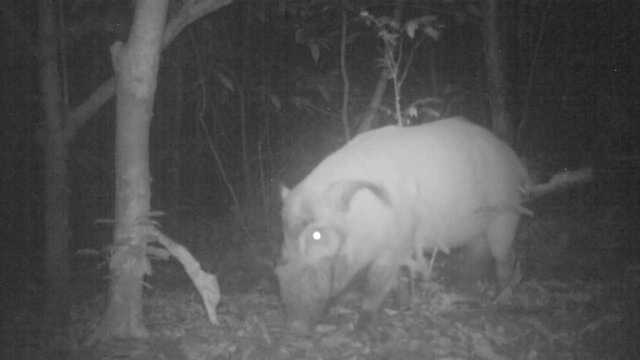

In [49]:
hog_img_pil